**Business Challenge**

Newa articles includes the entire corpus of articles published by ABC website in the given time range. With a volume of 200 articles per day and a good focus on international news, we can be certain that every event of significance has been captured here.


**Requirement**

1. Load the dataset and create a dataframe
2. Check the hygiene of data and sanitize it
3. Create DTM using following parameters
    * CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(1,2), stop_words='english')
4. Fit LDA model with 5 components
5. Create a report using:

    import mglearn as mg

    sorting = np.argsort(lda.components_)[:, ::-1]

    features = np.array(vect.get_feature_names())

    mg.tools.print_topics(topics=range(5), feature_names=features, sorting=sorting, topics_per_chunk=5, n_words=25)

Where LDA is the model created

Vect is the vector created using CountVectorizer

Key Issues:
1. publish_date: Date of publishing for the article in yyyyMMDD format
2. headline_text: Text of the headline in ASCII English, lowercase

**Dataset**
https://drive.google.com/file/d/10u4XP4NEcpDEgEAY4p46u3jYF3MK8ofK/view?usp=sharing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#download dataset
!gdown --id 10u4XP4NEcpDEgEAY4p46u3jYF3MK8ofK

Downloading...
From: https://drive.google.com/uc?id=10u4XP4NEcpDEgEAY4p46u3jYF3MK8ofK
To: /content/abcnews-date-text.csv
55.4MB [00:00, 133MB/s]


In [4]:
#load the data to dataframe
df = pd.read_csv("/content/abcnews-date-text.csv")
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [5]:
#check properties
print(df.shape)
print(df.dtypes)

(1103663, 2)
publish_date      int64
headline_text    object
dtype: object


In [6]:
#extract year and month from publish_date
df['year'] = df['publish_date'].astype(str).str[:4].astype(np.int64)
df['month'] = df['publish_date'].astype(str).str[4:6].astype(np.int64)
df.head()

,publish_date,headline_text,year,month
0,20030219,aba decides against community broadcasting lic...,2003,2
1,20030219,act fire witnesses must be aware of defamation,2003,2
2,20030219,a g calls for infrastructure protection summit,2003,2
3,20030219,air nz staff in aust strike for pay rise,2003,2
4,20030219,air nz strike to affect australian travellers,2003,2


In [7]:
#checking the hygiene of year and month
print(df.year.unique())
print(df.month.unique())

[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]
[ 2  3  4  5  6  7  8  9 10 11 12  1]


Text(0.5, 1.0, 'Number of Articles per Year')

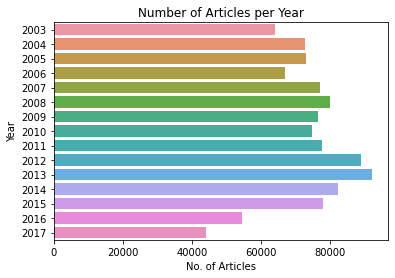

In [8]:
#plot the number of articles per year
import matplotlib.pyplot as plt
import seaborn as sns

with sns.color_palette("GnBu_d", 10):
  ax = sns.countplot(y='year', data=df)
  ax.set(xlabel='No. of Articles', ylabel='Year')
plt.title("Number of Articles per Year")

In [9]:
#remove stop words and apply stemming
corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

for i in range(len(df)):
  #remove special characters
  text = re.sub('[^a-zA-Z]', " ", df['headline_text'][i]).lower().split()

  #Stemming and removing stop words
  text = [ps.stem(word) for word in text if word not in stop_words]

  #joining all the cleaned words
  text = " ".join(text)

  #add cleaned text to corpus
  corpus.append(text)

#add the cleaned articles to dataframe
df['headline_cleaned'] = corpus
df.head()

,publish_date,headline_text,year,month,headline_cleaned
0,20030219,aba decides against community broadcasting lic...,2003,2,aba decid commun broadcast licenc
1,20030219,act fire witnesses must be aware of defamation,2003,2,act fire wit must awar defam
2,20030219,a g calls for infrastructure protection summit,2003,2,g call infrastructur protect summit
3,20030219,air nz staff in aust strike for pay rise,2003,2,air nz staff aust strike pay rise
4,20030219,air nz strike to affect australian travellers,2003,2,air nz strike affect australian travel


In [10]:
#create DTM with CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(1,2), stop_words='english')
dtm = vectorizer.fit_transform(df['headline_cleaned'].values.astype('U'))

In [11]:
#LDA model
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [13]:
#!pip install mglearn
import mglearn as mg
sorting = np.argsort(LDA.components_)[:, ::-1]
features = np.array(vectorizer.get_feature_names())
mg.tools.print_topics(topics=range(5), feature_names=features, sorting=sorting, topics_per_chunk=5, n_words=25)

     |████████████████████████████████| 542kB 5.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=41d1451a98fec91cc4cb736c5a12ba2ce4ca09f1ceea6f3cb9f207864fab7db5
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
plan          polic         court         win           man           
health        kill          face          urg           interview     
warn          crash         chang         new           charg         
market        council       govt          help          sydney        
rise          australian    accus         set           australia     
report        open          cut           world         jail          
new           car           govern        make          day           
boost         m